__This notebook tries to answer the question: <BR>
Is there a correlation between price per square meter and the corresponding floor?<BR>
(This is part of a recruitment challenge) <BR>
The data includes real estate data for Berlin - Germany__

<a href='#Result'>Result</a><BR>
<a href='#Visualization'>Visualization</a>

In [41]:
#we first import all the modules for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [42]:
# then we read the provided csv file
df = pd.read_csv('./data/realx_sample.csv')
df = df.drop('id', axis=1)
df.head()

,price,price_m2,area,zip_code,floor
0,230.00,NaN,22.33,10115,3
1,750.00,NaN,30.00,10115,5 OG
2,644.56,NaN,46.04,10115,EG
3,950.00,NaN,55.00,10115,EG
4,1500.00,NaN,60.00,10115,EG


In [43]:
# in order to understand how many values are missing (the first 5 entries had no price_m2 for example)
# we have a look at the dimensions of the df (1147 rows and 5 features + id)
print(df.shape)
df.info()

(1147, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 5 columns):
price       656 non-null float64
price_m2    491 non-null float64
area        1147 non-null float64
zip_code    1147 non-null int64
floor       1147 non-null object
dtypes: float64(3), int64(1), object(1)
memory usage: 44.9+ KB


In [44]:
# for a first glance a the numeric features we have a look at some statistics
df.describe()

,price,price_m2,area,zip_code
count,656.000000,491.000000,1147.000000,1147.000000
mean,1654.509329,17.216049,379.903670,11668.954664
std,1970.026870,46.991340,777.769136,1287.284463
min,3.750000,4.000000,10.000000,10115.000000
25%,635.000000,9.500000,74.515000,10559.000000
50%,1100.000000,13.000000,142.050000,10999.000000
75%,1900.812500,18.000000,379.500000,12679.000000
max,23570.400000,850.000000,11340.000000,14199.000000


In [45]:
# what is surprising is that the minimum price and the minimum price_m2 are similar 
# -> maybe the landlords entered data into the wrong fields?
conditions = (df['price_m2'].isnull()) & (df['price'] < 50)
df.loc[conditions, :]

,price,price_m2,area,zip_code,floor
63,22.50,NaN,444.00,10117,1
103,18.00,NaN,376.00,10178,2
105,20.50,NaN,435.00,10178,4. Etage
191,8.50,NaN,150.78,10365,3. OG Haus D
209,27.00,NaN,330.00,10405,1. OG
432,16.50,NaN,230.00,10719,2
439,20.00,NaN,897.98,10719,4
510,15.00,NaN,109.00,10829,Erdgeschoss
527,12.00,NaN,24.00,10963,2
563,14.00,NaN,2200.00,10969,5


In [46]:
# ok, we need to switch these values to the right feature 
# and delete the others so that we can calculate the correct ones
df.loc[conditions, 'price_m2'] = df.loc[conditions, 'price']
df.loc[conditions, 'price'] = np.nan
df.loc[conditions].head()

,price,price_m2,area,zip_code,floor
63,NaN,22.5,444.00,10117,1
103,NaN,18.0,376.00,10178,2
105,NaN,20.5,435.00,10178,4. Etage
191,NaN,8.5,150.78,10365,3. OG Haus D
209,NaN,27.0,330.00,10405,1. OG


In [47]:
# now to exclude that this happened to price_m2 as well we check if there are extraordinarily high values in the feature 
# and find the maximum of 850, which is unusual
condition = df['price_m2'] > 50
df.loc[condition, :]

# in the city center someone charges 850 per square meter, possibly for sale and not for rent

,price,price_m2,area,zip_code,floor
411,NaN,850.0,85.0,10717,5
518,NaN,623.0,63.0,10961,Sout.


In [48]:
# we can see that price and price_m2 have lots of missing values,
# while the other features seem to be complete (at first glance, will do more analysis later)
# we can imagine, that either the price or the price_m2 is provided and the other price can be 
# calculated accordingly -> we test whether the number of nan in the price columns adds up to the total rows
df['price'].isna().sum() + df['price_m2'].isna().sum() == df.shape[0]

True

In [49]:
# that means we should be able to calculate the missing values
df['price'] = df['price'].fillna(df['price_m2'] * df['area'])
df['price_m2'] = df['price_m2'].fillna(df['price'] / df['area'])

In [50]:
# we now test if the calculations were correct and find that 15 rows (1147 total rows - 1132 correctly calculated rows) are wrong?
(df['price_m2'] == df['price'] / df['area']).sum()

1132

In [51]:
# we therefore check if maybe some rounding errors occured during division and find that to be true
# a decision should be made whether prices should be rounded or not 
condition = df['price_m2'] != df['price'] / df['area']
wrong_calculations = df.loc[condition]
(wrong_calculations['price'] == wrong_calculations['price_m2'] * wrong_calculations['area']).all()

True

In [52]:
print(df.isna().sum())
df = df.dropna()

price       0
price_m2    0
area        0
zip_code    0
floor       0
dtype: int64


In [53]:
# after imputing the districts we can have a look at the general distribution of the zip_codes
df['zip_code'].value_counts().head()

10117    66
12489    41
10719    25
12681    24
10179    23
Name: zip_code, dtype: int64

In [54]:
def extract_floors(s):
    if s is not None:
        split_dot = s.split('.') 
        split_s = s.split()
        if split_dot[0].isdigit():
            return split_dot[0]
        elif split_s[0].isdigit():
            return split_s[0]
        else:
            return s
    return '10000'
    #elif split_s[-1] in ['EG', 'UG', 'DG', 'HP']:
    #    return split_s[-1]
    #return 'unknown'

In [55]:
# the last feature will most likely be the most diverse since it contains strings and those are not 
# standardized as can be seen by the amount of different values (130 different building stories)
# this will be normalized in the following steps (by isolating the numbers and standardizing the remaining strings)
# we first remove all the houses with multiple floors since those are non unique for floor prices
condition = df['floor'].str.contains('\+') \
            | df['floor'].str.contains('-') \
            | df['floor'].str.contains('und') \
            | df['floor'].str.contains(',') \
            | df['floor'].str.contains('/') \
            | df['floor'].str.contains('bis')
            
df.loc[condition, 'floor'] = 'multiple floors'
df.loc[df['floor'].str.contains('EG'), 'floor'] = 'EG'
df.loc[:, 'floor'] = df['floor'].str.replace(pat='Erdgeschoss', repl='0') \
                             .replace('Dachgeschoss', '-1') \
                             .replace('Eg', '0') \
                             .replace('EG', '0') \
                             .replace('1.EG', '0') \
                             .replace('Erdgeschoß', '0') \
                             .replace('Sout.', 'Souterrain') \
                             .replace('Hochpaterre', 'HP') \
                             .replace('Hochparterre', 'HP') \
                             .replace('hp', 'HP') \
                             .replace('Dachgeschoß', '-1') \
                             .replace('DG', '-1') \
                             .replace('ebenerdig', '0') \
                             .replace(r'[a-zA-Z]* EG', '0')
for i in range(0,10):
    df.loc[:,'floor'] = df['floor'].str.replace('0{}'.format(i), str(i)) \
                                 .replace('{} OG'.format(i), str(i)) \
                                 .apply(extract_floors)



df['floor'].value_counts()

0                     313
1                     171
2                     139
4                     113
5                     113
3                     101
6                      52
multiple floors        41
7                      25
Souterrain             15
HP                     13
8                      12
9                      10
-1                      5
10                      4
19                      3
12                      2
11                      2
UG                      2
13                      1
Deutschland             1
18                      1
Paterre                 1
diverse                 1
beletage                1
freistehendes Haus      1
20                      1
TG                      1
ZWG                     1
OG                      1
Name: floor, dtype: int64

In [56]:
# the remaining floors are still traversed by some string values (mostly isolated values)
# we convert the feature from string to numbers and in the process remove any remaining strings
df['floor'] = pd.to_numeric(df['floor'], 'coerce')
df = df.dropna()
df['floor'] = df['floor'].astype(int)
df.head()

,price,price_m2,area,zip_code,floor
0,230.00,10.300045,22.33,10115,3
1,750.00,25.000000,30.00,10115,5
2,644.56,14.000000,46.04,10115,0
3,950.00,17.272727,55.00,10115,0
4,1500.00,25.000000,60.00,10115,0


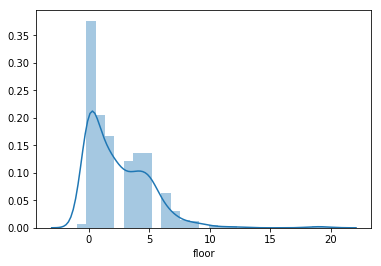

In [57]:
# now we can plot the data for visualization 
# it seems a lot of appartments were available on the ground floor 
sns.distplot(df['floor'])

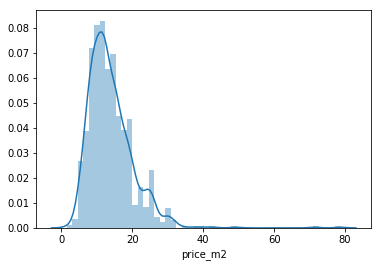

In [58]:
# the price per square meter range appears to be between 5 and 20
price_m2_outlier_detection = df['price_m2'] < 200
sns.distplot(df.loc[price_m2_outlier_detection, 'price_m2'])

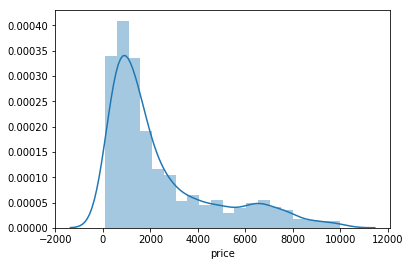

In [59]:
# the corresponding prices seem to be skewed towards lower prices, which might reflect that these are for rent
# while the higher ones are for sale, however they could also be huge? 
# We should look at the appartment sizes as well
price_outlier_detection = df['price'] < 10000
sns.distplot(df.loc[price_outlier_detection, 'price'])

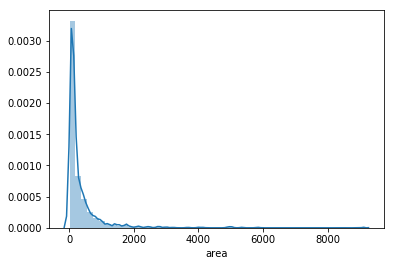

In [60]:
# apparently most of the vacancies are smaller than 1000 m2, while seldomly sizes bigger than 8000 m2 can be observed (factory hall?)
sns.distplot(df['area'])

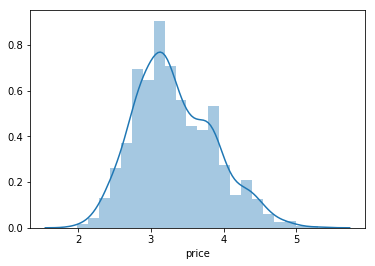

In [61]:
# if we ever had to predict the price according to other factors it is essential to check if the distribution of prizes
# follows a known pattern and usually the log10 of price distributions is similar to gaussian distributions 
# -> we can predict the prize (if non gaussian distribution -> central limit theorem could be applied)
sns.distplot(df['price'].apply(lambda x: np.log10(x)))

## Result

Text(0.5,0.98,'Correlation between price/m^2 and the floor')

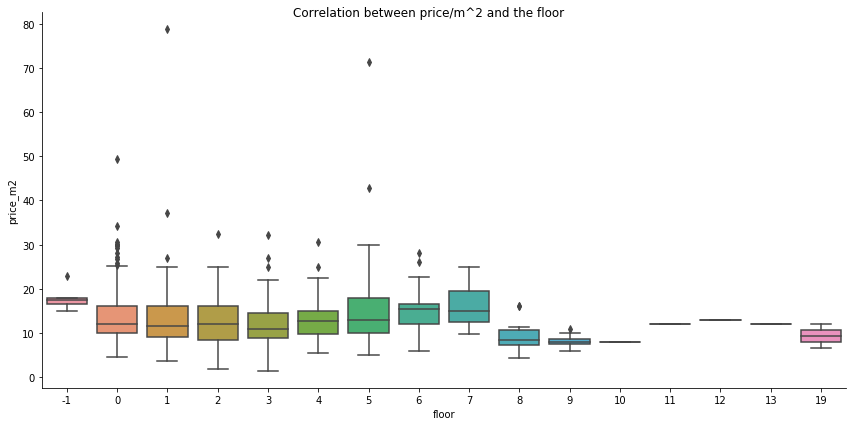

In [62]:
# the question provided by the company was whether there is a correlation between the price/m2 and the corresponding floor
# we can plot the data first to visualize any dependencies 
df_wo_outliers = df.loc[(price_m2_outlier_detection & price_outlier_detection), :]
p = sns.factorplot('floor', 'price_m2', data=df_wo_outliers, kind='box', size=6, aspect=2)
p.fig.suptitle('Correlation between price/m^2 and the floor')

In [63]:
# Apparently no correlation between the two can be found. However, in order to completely be sure
# we will let pandas calculate the correlation between the two features.

corr_matrix = df_wo_outliers.corr(method='pearson')
print('correlation between price/m^2 and floors: {:.2} \n\n'.format(corr_matrix.loc['price_m2', 'floor']))
corr_matrix.style.set_properties(subset=pd.IndexSlice['price_m2', 'floor'], **{'background-color': 'orange'}) 

# colors all fields with background color based on their values
# corr_matrix.style.background_gradient(cmap='PiYG') 

correlation between price/m^2 and floors: -0.028 




,price,price_m2,area,zip_code,floor
price,1,0.216009,0.847593,-0.136646,0.208793
price_m2,0.216009,1,-0.126653,-0.38449,-0.0280356
area,0.847593,-0.126653,1,0.0523185,0.215849
zip_code,-0.136646,-0.38449,0.0523185,1,-0.000382673
floor,0.208793,-0.0280356,0.215849,-0.000382673,1


### We can conclude there is __no correlation__ between the floor the appartment is on and the corresponding price per square meter.



<BR><BR><BR><BR><BR>
## Visualization

In [64]:
# For the purpose of visualizing the price data using an interactive plot we need to get some geodata first

In [65]:
import geopandas as gpd

# we now load the data from https://www.suche-postleitzahl.org/plz-karte-erstellen
#gdf = gpd.read_file('./geo/berlin_plz.geojson') #old geojson file without all available zip codes

# For Berlin specifically the Technologiestiftung Berlin recently (Feb 2018) released up to date zip code geojson files
gdf = gpd.read_file('./geo/plz_technologiestiftung_berlin.geojson')
gdf.drop(['gml_id', 'spatial_alias', 'spatial_type'], axis=1, inplace=True)
gdf['spatial_name'] = gdf['spatial_name'].astype(int)
gdf.head(2)

,spatial_name,geometry
0,10115,"POLYGON ((13.36585984657949 52.53565958104801,..."
1,10117,"POLYGON ((13.37663404780158 52.50819300592241,..."


In [66]:
gdf.crs

{'init': 'epsg:4326'}

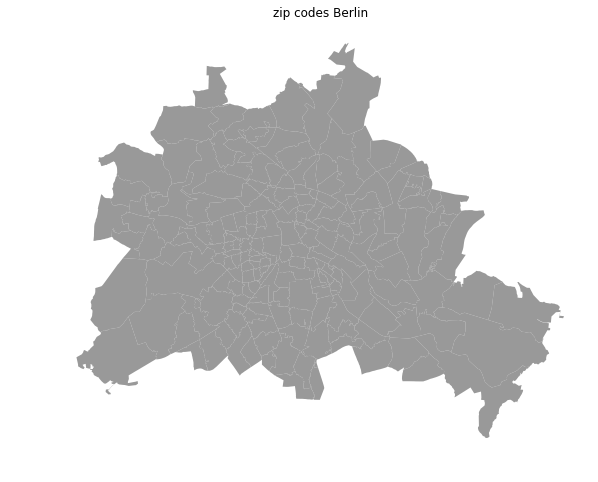

In [91]:
# since the original crs was a little skewed we change the crs to a more suitable candidate (http://epsg.io/4839)
# after the changes Berlin looks like expected and is plotted to have an overview
gdf = gdf.to_crs(epsg=4839)
ax = gdf.plot(figsize=(10, 8), alpha=0.8, color='grey')
# we could also show the individual zip code areas with names, however there is a lot of overlap in the center
# gdf.apply(lambda x: ax.annotate(s=x.spatial_name, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
ax.set_title('zip codes Berlin')
ax.set_axis_off()

In [68]:
# It seems reasonable to plot the median price per square meter using the GeoJSON we previously imported
# we therefore need to group the data using the zip codes
df_grouped = df.groupby('zip_code')['price_m2'].median()
df_grouped = df_grouped.reset_index()

In [69]:
# now the two dataframes (one pandas, one geopandas) need to be merged on their common feature - the zip codes, 
# we also clean up a little and convert the resulting dataframe to a geo-dataframe
gdf2 = pd.merge(df_grouped, gdf, left_on='zip_code', right_on='spatial_name')
gdf2.drop('spatial_name', axis=1, inplace=True)
gdf2 = gpd.GeoDataFrame(gdf2)
gdf2['price_m2'] = gdf2['price_m2'].astype(int)

In [82]:
# it appears we have data for 161 zip codes, so lets plot the data using a choropleth map
gdf2.describe()

,zip_code,price_m2
count,161.000000,161.000000
mean,12103.105590,11.478261
std,1281.621139,3.886012
min,10115.000000,5.000000
25%,10777.000000,9.000000
50%,12207.000000,11.000000
75%,13347.000000,14.000000
max,14199.000000,25.000000


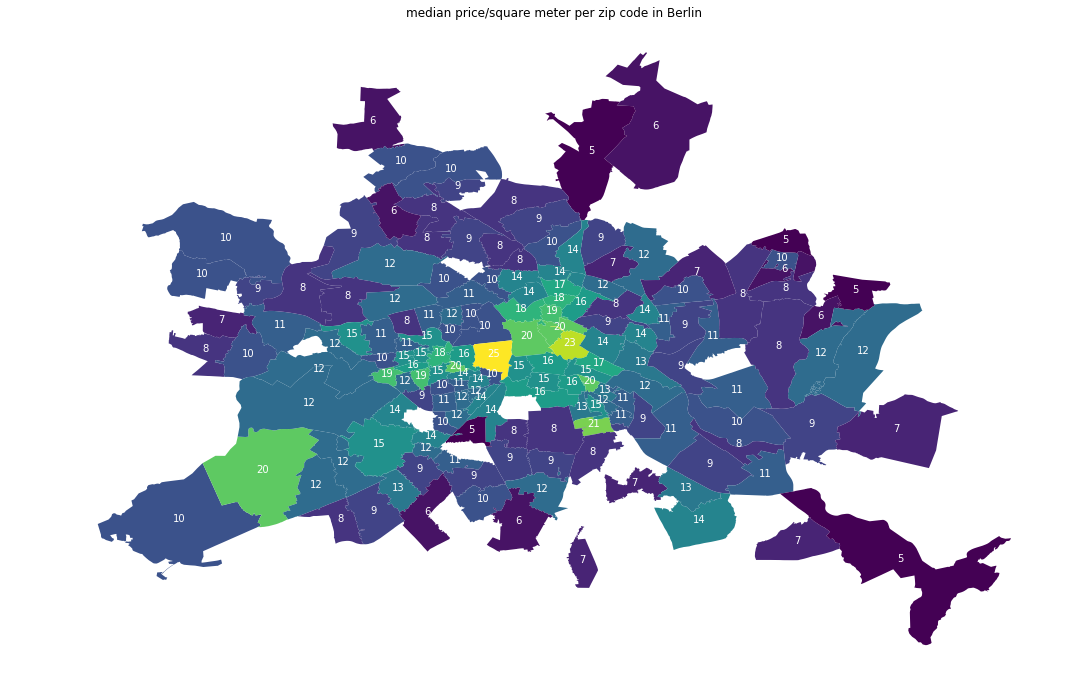

In [95]:
fig, ax = plt.subplots(1, figsize=(18, 12))
gdf2.plot(column='price_m2', ax=ax)
gdf2.apply(lambda x: ax.annotate(s=x.price_m2, xy=x.geometry.centroid.coords[0], ha='center', color='white'),axis=1)
ax.set_title('median price/square meter per zip code in Berlin')
ax.axis('off')
print()

__We can see that the inner city seems to be rather expensive in comparison to the eastern regions, <BR>
the lowest price per square meter is 5, while the highest is 25 (mean - 11.47 +/- 3.88 (std)).__<BR>
The data is rather dense and in order to have the best user experience a Tableau Dashboard will be created and uploaded soon.